# Getting data from NOAA webpage

In [1]:
!wget -O land_global_temperature_anomaly-1880-2015.csv https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv

--2017-01-04 13:27:29--  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv
Resolviendo www.ncdc.noaa.gov (www.ncdc.noaa.gov)... 205.167.25.171, 205.167.25.172, 2610:20:8040:2::172, ...
Conectando con www.ncdc.noaa.gov (www.ncdc.noaa.gov)[205.167.25.171]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [text/plain]
Grabando a: “land_global_temperature_anomaly-1880-2015.csv”

    [ <=>                                   ] 23.796       135KB/s   en 0,2s   

2017-01-04 13:27:30 (135 KB/s) - “land_global_temperature_anomaly-1880-2015.csv” guardado [23796]



In [5]:
import numpy as np

In [6]:
!head land_global_temperature_anomaly-1880-2015.csv

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


In [8]:
np.loadtxt(fname='land_global_temperature_anomaly-1880-2015.csv', delimiter=',', skiprows=4)

array([[  1.88001000e+05,  -1.53800000e-01],
       [  1.88002000e+05,  -5.77100000e-01],
       [  1.88003000e+05,  -7.25000000e-01],
       ..., 
       [  2.01510000e+05,   1.32120000e+00],
       [  2.01511000e+05,   1.28280000e+00],
       [  2.01512000e+05,   1.87220000e+00]])

In [9]:
T_land=np.loadtxt(fname='land_global_temperature_anomaly-1880-2015.csv', delimiter=',', skiprows=4)

In [11]:
np.shape(T_land)

(1632, 2)

In [12]:
from matplotlib import pyplot
%matplotlib inline

/home/lmc17/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/lmc17/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


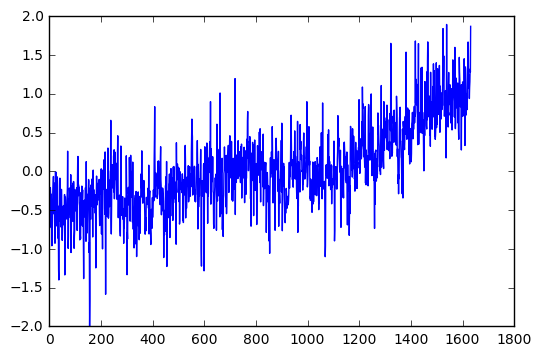

In [16]:
pyplot.plot(T_land[:,1]); #No ugly comment --> ;

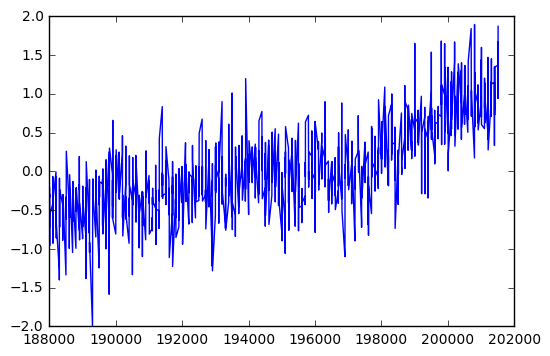

In [17]:
pyplot.plot(T_land[:,0],T_land[:,1]);

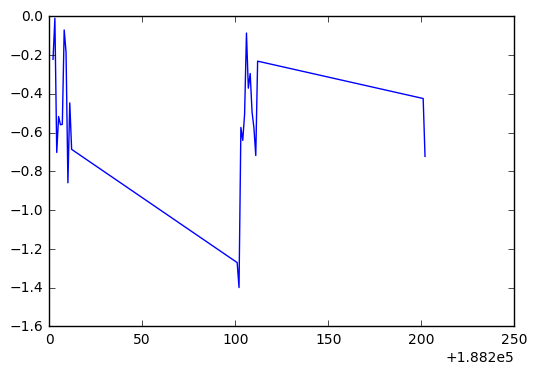

In [18]:
pyplot.plot(T_land[25:50,0],T_land[25:50,1]);

# Using `numpy.arange()` for creating our date-array 

In [20]:
date= np.arange('1880','2016', dtype=('datetime64[M]'))

In [21]:
print(date)

['1880-01' '1880-02' '1880-03' ..., '2015-10' '2015-11' '2015-12']


In [22]:
dummy = np.linspace(1,1632,1632)
print(dummy)

[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   1.63000000e+03
   1.63100000e+03   1.63200000e+03]


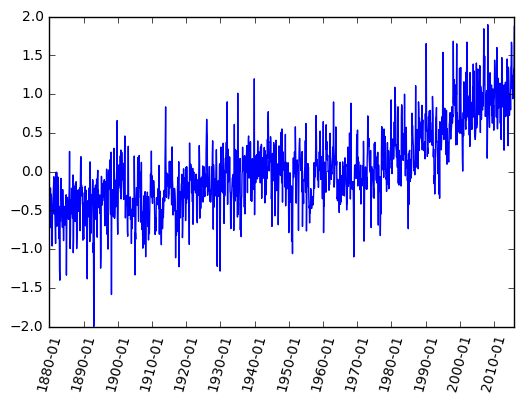

In [24]:
pyplot.xticks(dummy[::12*10], date[::12*10], rotation=75)
pyplot.plot(dummy, T_land[:,1]);

In [29]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

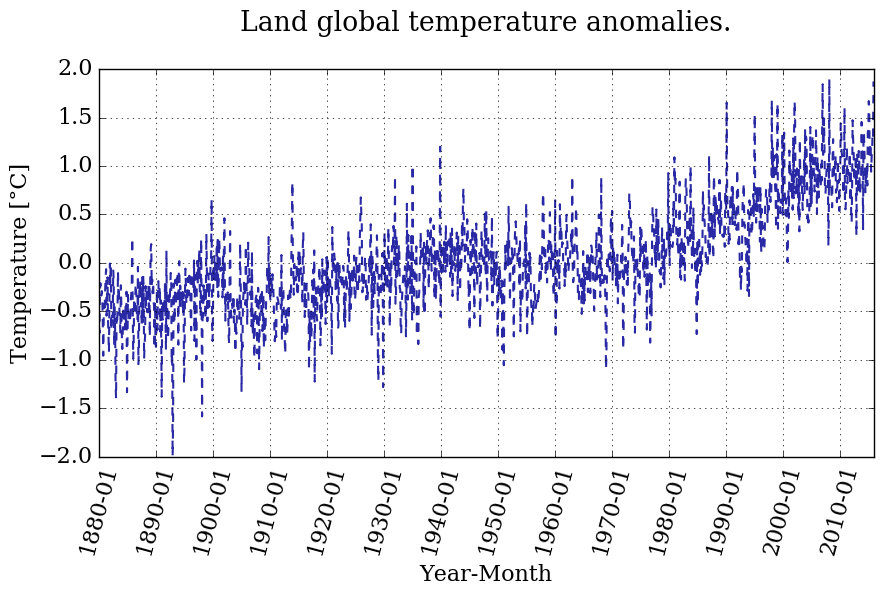

In [53]:
pyplot.figure(figsize=(10,5))
pyplot.xticks(dummy[::12*10], date[::12*10], rotation=75)
pyplot.plot(dummy, T_land[:,1], color='#2929a6', ls='--', lw=1.5)
pyplot.title('Land global temperature anomalies.\n')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Temperature [°C]')
pyplot.grid()
pyplot.savefig('prueba.pdf')

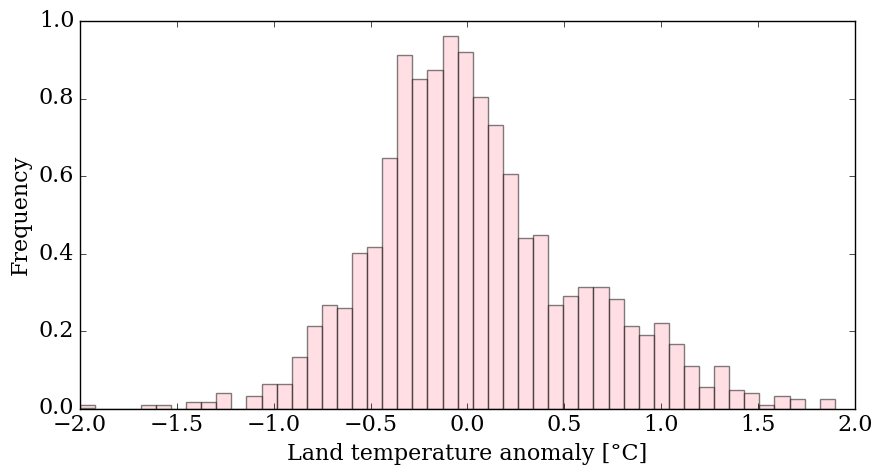

In [62]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], bins=50, normed=True, color='pink', alpha=0.5)
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Frequency');

# Let's do some stats

In [66]:
mean_T =np.mean(T_land[:,1])
median_T = np.median(T_land[:,1])

print('The mean value is {:.5} and the median is {:.5}'.format(mean_T, median_T))

The mean value is 0.04031 and the median is -0.0276


In [68]:
variance_T = np.var(T_land[:,1])
sigma_T = np.sqrt(variance_T)
print('The variance is {:.5} and the standard deviation {:.5}'.format(variance_T,
                                                                      sigma_T))

The variance is 0.28041 and the standard deviation 0.52954


In [69]:
from scipy import stats

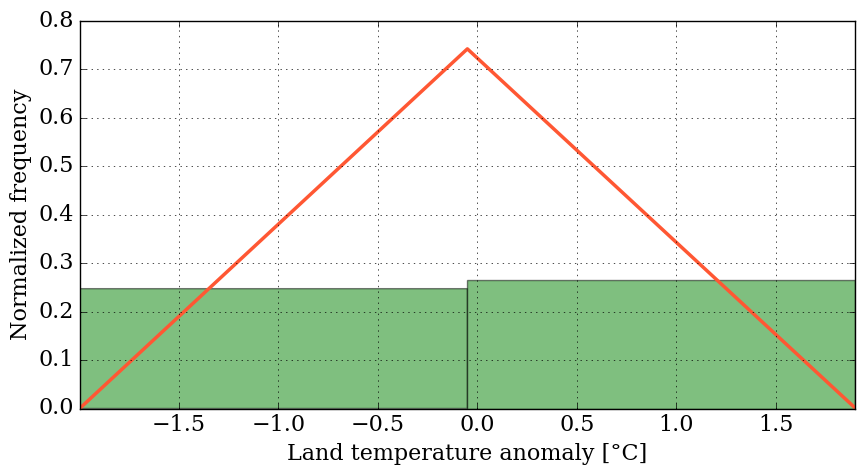

In [74]:
bins = np.linspace(min(T_land[:,1]), max(T_land[:,1]), 3)

pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], bins, normed=True, facecolor='g', alpha=0.5)
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T),
            color='#ff5733', ls='-', lw=2.5)
pyplot.xlim(min(T_land[:,1]), max(T_land[:,1]))
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency')
pyplot.grid();
